In [113]:
# dataset: https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches as mpatches
from matplotlib.legend import Legend
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

from utils import (get_unique_chars, extract_lines_val, extract_labels,
                   get_features, calculate_classes_accuracy, KNN)

In [31]:
FEATURES_FILE_PATH = 'UCI_HAR_Dataset/features.txt'

X_TRAIN_FILE_PATH = 'UCI_HAR_Dataset/train/X_train.txt'
Y_TRAIN_FILE_PATH = 'UCI_HAR_Dataset/train/y_train.txt'

X_TEST_FILE_PATH = 'UCI_HAR_Dataset/test/X_test.txt'
Y_TEST_FILE_PATH = 'UCI_HAR_Dataset/test/y_test.txt'

ACTIVITY_LABELS = {'1': 'WALKING',
                   '2': 'WALKING_UPSTAIRS',
                   '3': 'WALKING_DOWNSTAIRS',
                   '4': 'SITTING',
                   '5': 'STANDING',
                   '6': 'LAYING'}

In [32]:
features = np.array(get_features(FEATURES_FILE_PATH))

X_train = np.array(extract_lines_val(X_TRAIN_FILE_PATH))
y_train = np.array(extract_labels(Y_TRAIN_FILE_PATH))

X_test = np.array(extract_lines_val(X_TEST_FILE_PATH))
y_test = np.array(extract_labels(Y_TEST_FILE_PATH))

In [33]:
train_df = pd.DataFrame(X_train, columns=features)
train_df['Activity'] = y_train

test_df = pd.DataFrame(X_test, columns=features)
test_df['Activity'] = y_test

In [34]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 562 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), object(1)
memory usage: 31.5+ MB


In [69]:
train_df.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,0.125293,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.250994,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.023692,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,0.134000,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,0.289096,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.946700,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000


In [71]:
any(train_df.isnull().any()), any(test_df.isnull().any())

(False, False)

In [72]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_train)
pca_df = pd.DataFrame(data=principal_components,
                      columns=['Principal component 1', 'Principal component 2'])
pca_df['Activity'] = y_train
pca_df

,Principal component 1,Principal component 2,Activity
0,-5.520280,-0.290278,5
1,-5.535350,-0.082530,5
2,-5.474988,0.287387,5
3,-5.677232,0.897031,5
4,-5.748749,1.162952,5
...,...,...,...
7347,6.253517,-2.636768,2
7348,5.782321,-2.437814,2
7349,5.857505,-3.081844,2
7350,5.421095,-3.426431,2


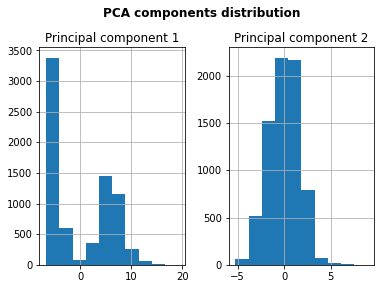

In [106]:
pca_hist_ax = pca_df.hist()
plt.suptitle("PCA components distribution", y=1.02, fontsize='large', fontweight='semibold')
plt.gcf().savefig('pca_df_hist.jpg', bbox_inches='tight')

In [38]:
LDA_model = LDA(n_components=2)
lda_components = LDA_model.fit_transform(X_train, y_train)
lda_df = pd.DataFrame(data=lda_components,
                      columns=['Principal component 1', 'Principal component 2'])
lda_df['Activity'] = y_train
lda_df

,Principal component 1,Principal component 2,Activity
0,10.131303,-8.600555,5
1,9.774950,-6.967300,5
2,9.767446,-7.145707,5
3,9.745219,-8.133894,5
4,8.886116,-7.619552,5
...,...,...,...
7347,-14.990550,1.496184,2
7348,-13.880743,1.098592,2
7349,-14.363545,0.965910,2
7350,-14.592779,1.905171,2


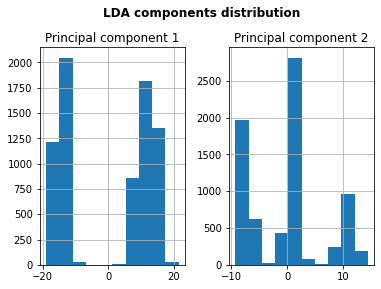

In [107]:
lda_df.hist()
plt.suptitle("LDA components distribution", y=1.02, fontsize='large', fontweight='semibold')
plt.gcf().savefig('lda_df_hist.jpg', bbox_inches='tight')

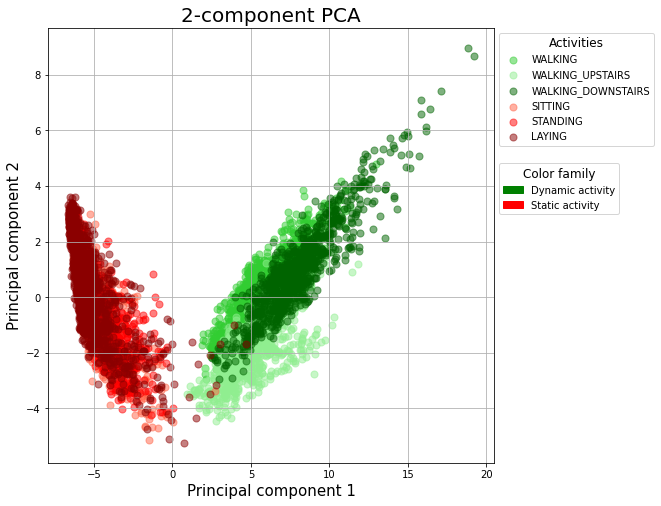

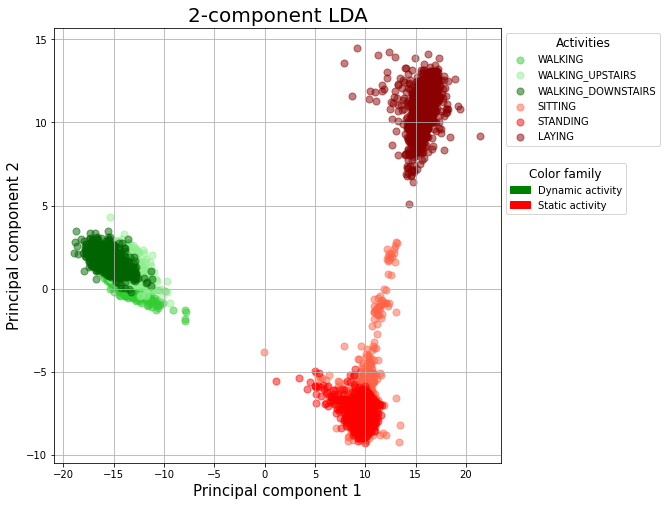

In [53]:
fig_pca = plt.figure(figsize=(8, 8))

activities = ACTIVITY_LABELS.keys()
colors = ['limegreen', 'lightgreen', 'darkgreen', 'tomato', 'red', 'darkred']
dynamic_color_family = mpatches.Patch(color='green')
static_color_family = mpatches.Patch(color='red')


pca_ax = fig_pca.add_subplot(1, 1, 1)

pca_ax.set_xlabel('Principal component 1', fontsize = 15)
pca_ax.set_ylabel('Principal component 2', fontsize = 15)
pca_ax.set_title('2-component PCA', fontsize = 20)

for activity, color in zip(activities, colors):
    kept_indices = pca_df['Activity'] == activity
    pca_ax.scatter(pca_df.loc[kept_indices, 'Principal component 1'],
                   pca_df.loc[kept_indices, 'Principal component 2'],
                   c = color, s = 50, alpha=0.5)

pca_ax.legend(ACTIVITY_LABELS.values(), title='Activities', title_fontsize='large',
              loc='upper left', bbox_to_anchor=(1, 1))
static_dymanic_legend = Legend(pca_ax, title='Color family', title_fontsize='large', 
                               handles=[dynamic_color_family, static_color_family],
                               labels=['Dynamic activity', 'Static activity'],
                               loc='upper left', bbox_to_anchor=(1, 0.7))
pca_ax.add_artist(static_dymanic_legend)
pca_ax.grid()


fig_lda = plt.figure(figsize=(8, 8))


lda_ax = fig_lda.add_subplot(1, 1, 1)

lda_ax.set_xlabel('Principal component 1', fontsize = 15)
lda_ax.set_ylabel('Principal component 2', fontsize = 15)
lda_ax.set_title('2-component LDA', fontsize = 20)

for activity, color in zip(activities, colors):
    kept_indices = lda_df['Activity'] == activity
    lda_ax.scatter(lda_df.loc[kept_indices, 'Principal component 1'],
                   lda_df.loc[kept_indices, 'Principal component 2'],
                   c = color, s = 50, alpha=0.5)

lda_ax.legend(ACTIVITY_LABELS.values(), title='Activities', title_fontsize='large',
              loc='upper left', bbox_to_anchor=(1, 1))
static_dymanic_legend = Legend(lda_ax, title='Color family', title_fontsize='large', 
                               handles=[dynamic_color_family, static_color_family],
                               labels=['Dynamic activity', 'Static activity'],
                               loc='upper left', bbox_to_anchor=(1, 0.7))
lda_ax.add_artist(static_dymanic_legend)
lda_ax.grid()


fig_pca.savefig('pca1.jpg', bbox_inches='tight')
fig_lda.savefig('lda1.jpg', bbox_inches='tight')

# LDA

In [11]:
lda_predicted = LDA_model.predict(X_test)

lda_acc = calculate_classes_accuracy(y_test, lda_predicted)

print('\nLDA - Activity classification accuracy:')
for activity_acc, activity in zip(lda_acc, ACTIVITY_LABELS.values()):
    print(' '*4 + f'{activity}: {activity_acc:.4f}')

print(f'\n  Overall accuracy: {sum(lda_acc) / len(lda_acc):.4f}')


LDA - Activity classification accuracy:
    WALKING: 0.9939
    WALKING_UPSTAIRS: 0.9891
    WALKING_DOWNSTAIRS: 0.9949
    SITTING: 0.9732
    STANDING: 0.9735
    LAYING: 1.0000

  Overall accuracy: 0.9874


# KNN

In [12]:
my_knn = KNN()
my_knn.fit(X_train, y_train)
my_knn_pred = my_knn.predict(X_test)

my_knn_acc = calculate_classes_accuracy(y_test.astype(np.int8), my_knn_pred)

print('\nKNN - Activity classification accuracy:')
for activity_acc, activity in zip(my_knn_acc, ACTIVITY_LABELS.values()):
    print(' '*4 + f'{activity}: {activity_acc:.4f}')

print(f'\n  Overall accuracy: {sum(my_knn_acc) / len(my_knn_acc):.4f}')
print('\n')


KNN - Activity classification accuracy:
    WALKING: 0.9674
    WALKING_UPSTAIRS: 0.9671
    WALKING_DOWNSTAIRS: 0.9640
    SITTING: 0.9522
    STANDING: 0.9535
    LAYING: 0.9990

  Overall accuracy: 0.9672


# KNN+PCA

In [13]:
my_knn = KNN()
my_knn.fit(np.array(pca_df[['Principal component 1', 'Principal component 2']]), y_train)
my_knn_pred_pca = my_knn.predict(pca.transform(X_test))

my_knn_pca_acc = calculate_classes_accuracy(y_test.astype(np.int8), my_knn_pred_pca)

print('\nKNN - Activity classification accuracy:')
for activity_acc, activity in zip(my_knn_pca_acc, ACTIVITY_LABELS.values()):
    print(' '*4 + f'{activity}: {activity_acc:.4f}')

print(f'\n  Overall accuracy: {sum(my_knn_pca_acc) / len(my_knn_pca_acc):.4f}')


KNN - Activity classification accuracy:
    WALKING: 0.8738
    WALKING_UPSTAIRS: 0.9382
    WALKING_DOWNSTAIRS: 0.8789
    SITTING: 0.7577
    STANDING: 0.7950
    LAYING: 0.8537

  Overall accuracy: 0.8496


# KNN+LDA

In [14]:
my_knn = KNN()
my_knn.fit(np.array(lda_df[['Principal component 1', 'Principal component 2']]), y_train)
my_knn_pred_lda = my_knn.predict(LDA_model.transform(X_test))

my_knn_lda_acc = calculate_classes_accuracy(y_test.astype(np.int8), my_knn_pred_lda)

print('\nKNN - Activity classification accuracy:')
for activity_acc, activity in zip(my_knn_lda_acc, ACTIVITY_LABELS.values()):
    print(' '*4 + f'{activity}: {activity_acc:.4f}')

print(f'\n  Overall accuracy: {sum(my_knn_lda_acc) / len(my_knn_lda_acc):.4f}')


KNN - Activity classification accuracy:
    WALKING: 0.8249
    WALKING_UPSTAIRS: 0.8378
    WALKING_DOWNSTAIRS: 0.8897
    SITTING: 0.8341
    STANDING: 0.8344
    LAYING: 1.0000

  Overall accuracy: 0.8702
